In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine = pd.read_csv('https://bit.ly/wine-date')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine['class'].unique()

array([0., 1.])

In [5]:
y = wine['class']
x = wine.drop('class', axis=1)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [8]:
log = LogisticRegression()
log.fit(x_train, y_train)
log.score(x_test, y_test)

0.7748717948717949

In [20]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
print(tree.score(x_train, y_train))
print(tree.score(x_test, y_test))

0.9978007477457664
0.861025641025641


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
scaler.fit(x_train)

StandardScaler()

In [1]:
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

NameError: name 'scaler' is not defined

In [13]:
log = LogisticRegression()
log.fit(scaled_x_train, y_train)
log.score(scaled_x_test, y_test)

0.7784615384615384

In [27]:
tree = DecisionTreeClassifier()
tree.fit(scaled_x_train, y_train)
print(tree.score(scaled_x_train, y_train))
print(tree.score(scaled_x_test, y_test))

0.9978007477457664
0.8594871794871795


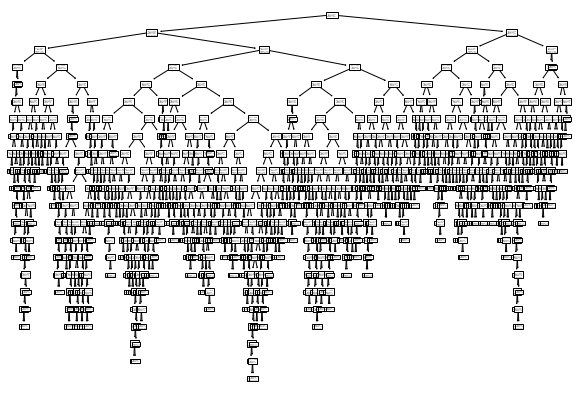

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(tree)
plt.show()

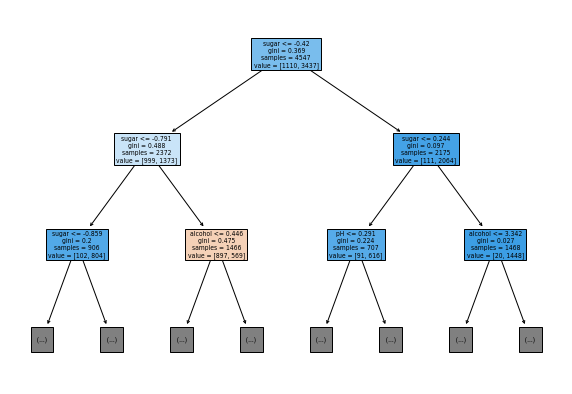

In [16]:
plt.figure(figsize=(10,7))
plot_tree(tree, max_depth=2, filled=True, feature_names=['alcohol', 'sugar','pH'])
plt.show()

In [17]:
tree.feature_importances_

array([0.25049819, 0.51510946, 0.23439235])

In [28]:
# tree model은 과적합 현상이 심함..
# 과적합 : 모델이 train data에 지나치게 학습이 된 복잡한 모델이 생성..
# 과적합 해소 : 데이터를 더 확복, 모델에 규제를 주어 지나치게 모델이 복잡해지지 않도록, ensemble
# => ensemble

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000, max_depth=10 )

In [35]:
rfc.fit(scaled_x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [36]:
train_score = rfc.score(scaled_x_train, y_train)
test_score = rfc.score(scaled_x_test, y_test)
print(train_score, test_score)

0.938201011656037 0.8738461538461538


In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
ada = AdaBoostClassifier(n_estimators = 1000)
ada.fit(scaled_x_train, y_train)
train_score = ada.score(scaled_x_train, y_train)
test_score = ada.score(scaled_x_test, y_test)
print(train_score, test_score)

0.8772817242137673 0.8569230769230769


In [45]:
grad = GradientBoostingClassifier(n_estimators = 1000, max_depth=5)
grad.fit(scaled_x_train, y_train)
train_score = grad.score(scaled_x_train, y_train)
test_score = grad.score(scaled_x_test, y_test)
print(train_score, test_score)

0.9978007477457664 0.8743589743589744


In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 1000, max_depth=5)
xgb.fit(scaled_x_train, y_train)
train_score = xgb.score(scaled_x_train, y_train)
test_score = xgb.score(scaled_x_test, y_test)
print(train_score, test_score)

0.9960413459423796 0.8692307692307693


In [51]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators = 1000, max_depth=5)
lgb.fit(scaled_x_train, y_train)
train_score = lgb.score(scaled_x_train, y_train)
test_score = lgb.score(scaled_x_test, y_test)
print(train_score, test_score)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
0.9861447107983285 0.8723076923076923


In [ ]:
# cross_validation
# gridsearchCV

In [ ]:
# 월: 